In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import boxcox
from scipy.stats import shapiro, kstest
from scipy.stats import levene

# Height and Weight

In [2]:
df_hw = pd.read_csv("weight-height.csv")

In [3]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Normality

In [4]:
height = df_hw["Height"]

<AxesSubplot:xlabel='Height', ylabel='Count'>

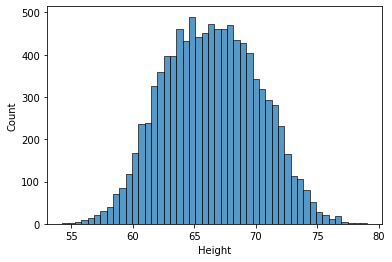

In [5]:
sns.histplot(height)

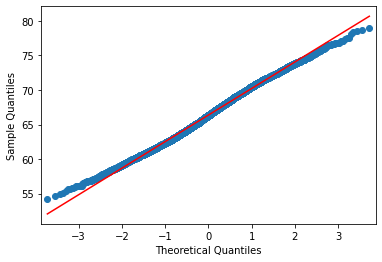

In [7]:
# QQ plot
qqplot(height, line="s")
plt.show()

In [8]:
height.shape

(10000,)

In [27]:
# Shapiro and Kolmogrov-Smirnoff test (KSTest) work best in 50 to 200
# They break down for large sample size
height_subset = height.sample(100)

In [13]:
# Shapiro
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


In [18]:
# KSTest
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = kstest(
    height_subset, 
    norm.cdf, 
    args=(height_subset.mean(), height_subset.std())
)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


## Variance

<AxesSubplot:xlabel='Height', ylabel='Count'>

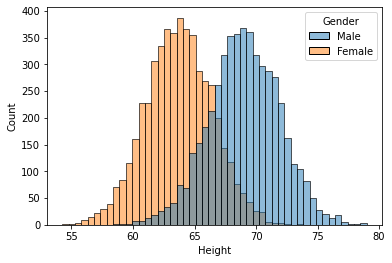

In [37]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [38]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [39]:
height_men.mean()

69.02634590621741

In [40]:
height_women.mean()

63.70877360342507

In [42]:
# H0: Men and women has same average height (high p-value)
ttest_ind(height_men, height_women)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

In [43]:
height_men.var()

8.198843252520467

In [44]:
height_women.var()

7.2699474936701245

In [47]:
# Levene test compares variance
# H0: both have same variance
test_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

# levene can take more than 2 also

Reject H0
Variances are different


# Waiting time

In [19]:
df_wt = pd.read_csv("waiting_time.csv")

In [20]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<AxesSubplot:xlabel='time', ylabel='Count'>

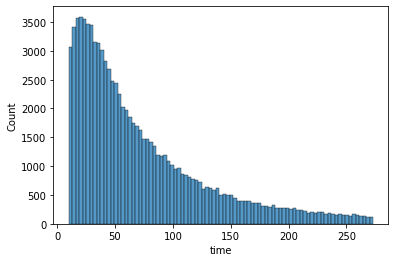

In [21]:
sns.histplot(df_wt["time"])

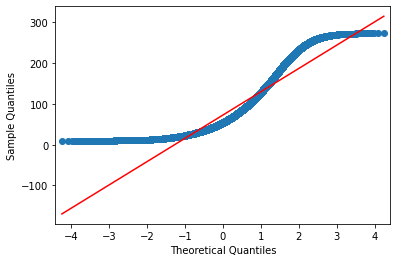

In [22]:
qqplot(df_wt["time"], line="s")
plt.show()

In [23]:
df_wt_subset = df_wt.sample(50)["time"]

In [32]:
# H0: Data is Gaussian (high p-value)
# Ha: Data is not Gaussian  (low p-value)
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

1.7908221707330085e-05
Reject H0
Data is not Gaussian


Can we transform the data to look like Gaussian? 
We use `boxcox`

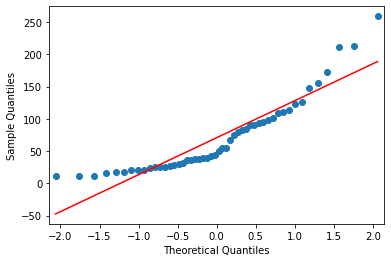

In [29]:
qqplot(df_wt_subset, line="s")
plt.show()

In [30]:
transformed_data = boxcox(df_wt_subset)[0] # Not always guarantees Gaussian, but will be closer to Gaussian than original

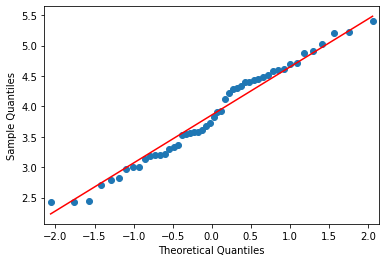

In [31]:
qqplot(transformed_data, line="s")
plt.show()

In [35]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(transformed_data)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Fail to reject H0
Data is Gaussian
